Training with SGD...
Epoch 1/10 - Loss: 1.6792
Epoch 2/10 - Loss: 1.0121
Epoch 3/10 - Loss: 0.8130
Epoch 4/10 - Loss: 0.7267
Epoch 5/10 - Loss: 0.6765
Epoch 6/10 - Loss: 0.6422
Epoch 7/10 - Loss: 0.6160
Epoch 8/10 - Loss: 0.5948
Epoch 9/10 - Loss: 0.5774
Epoch 10/10 - Loss: 0.5627
Training with SGD + Momentum...
Epoch 1/10 - Loss: 1.4902
Epoch 2/10 - Loss: 0.8810
Epoch 3/10 - Loss: 0.7308
Epoch 4/10 - Loss: 0.6630
Epoch 5/10 - Loss: 0.6215
Epoch 6/10 - Loss: 0.5919
Epoch 7/10 - Loss: 0.5688
Epoch 8/10 - Loss: 0.5506
Epoch 9/10 - Loss: 0.5357
Epoch 10/10 - Loss: 0.5234
Training with RMSProp...
Epoch 1/10 - Loss: 0.5019
Epoch 2/10 - Loss: 0.3805
Epoch 3/10 - Loss: 0.3419
Epoch 4/10 - Loss: 0.3186
Epoch 5/10 - Loss: 0.2997
Epoch 6/10 - Loss: 0.2872
Epoch 7/10 - Loss: 0.2724
Epoch 8/10 - Loss: 0.2623
Epoch 9/10 - Loss: 0.2524
Epoch 10/10 - Loss: 0.2421
Training with Adam...
Epoch 1/10 - Loss: 0.5019
Epoch 2/10 - Loss: 0.3813
Epoch 3/10 - Loss: 0.3434
Epoch 4/10 - Loss: 0.3185
Epoch 5/10 - 

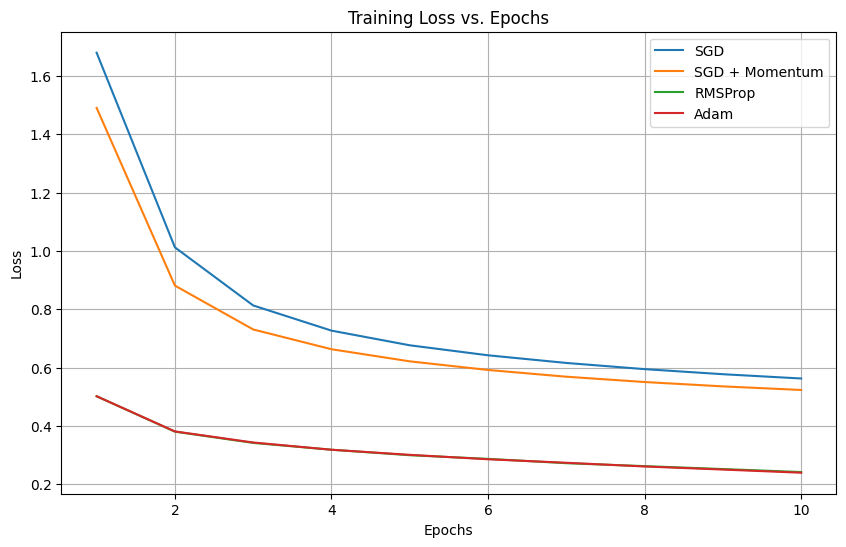

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.001),
    "SGD + Momentum": lambda params: optim.SGD(params, lr=0.001, momentum=0.3),
    "RMSProp": lambda params: optim.RMSprop(params, lr=0.001),
    "Adam": lambda params: optim.Adam(params, lr=0.001)
}

loss_fn = nn.CrossEntropyLoss()
epochs = 10
results = {}

for name, optimizer_fn in optimizers.items():
    print(f"Training with {name}...")
    model = SimpleNN()
    optimizer = optimizer_fn(model.parameters())
    train_losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        model.train()
        
        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        train_losses.append(epoch_loss / len(train_loader))
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_losses[-1]:.4f}")
    
    results[name] = train_losses


plt.figure(figsize=(10, 6))
for name, losses in results.items():
    plt.plot(range(1, epochs + 1), losses, label=name)

plt.title("Training Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()
